<a href="https://colab.research.google.com/github/vasilyryabtsev/ml-hse-24-25/blob/main/ai_hw2_gd_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

a) $${f(x)=x^2-30x+1\rightarrow extr}$$
$${f'(x)=2x-30=0 \rightarrow x_0=15}$$
$$f''(x)=2>0$$
$$x_0=15\;-\;min$$

b) $$g(x)=-x^3+5x-7x^2+17 \rightarrow extr$$
$$g'(x)=-3x^2+5-14x=0 \rightarrow x_{01}=\frac{1}{3},\;x_{02}=-5$$
$$g''(x)=-6x-14 \rightarrow g''(x_{01})=-16<0,\;g''(x_{02})=16>0$$
$$x_{01}=\frac{1}{3}\;-\;max$$
$$x_{02}=-5\;-\;min$$

c) $$h(x)=x^2-\frac{1}{x}\rightarrow extr$$
$$h'(x)=2x+\frac{1}{x^2}=\frac{2x^3+1}{x^2}=2\frac{(x+0.5^{\frac{1}{3}})(x^2-x+0.5)}{x^2}=0\rightarrow x_0=-0.5^{\frac{1}{3}}$$
$$h''(x)=2(1-\frac{1}{x^3})=2\frac{x^3-1}{x^3}=\rightarrow h''(x_0)=6>0$$
$$x_0=-0.5^{\frac{1}{3}}\approx -0.794\;-\;min$$

d) $$j(x)=\frac{1}{x^5}+x^{17}+8 \rightarrow extr$$
$$j'(x)=-\frac{5}{x^6}+17x^{16}=\frac{-5+17x^{22}}{x^6}=\frac{(\sqrt{17}x^{11}-\sqrt{5})(\sqrt{17}x^{11}+\sqrt{5})}{x^6}=0$$
$$j'(x)=0 \rightarrow \frac{(\sqrt{17}x^{11}-\sqrt{5})(\sqrt{17}x^{11}+\sqrt{5})}{x^6}=0 \rightarrow x_{01}=(\frac{5}{17})^{\frac{1}{22}},\;x_{02}=-(\frac{5}{17})^{\frac{1}{22}}$$
$$j''(x)=\frac{30}{x^7}+272x^{15} \rightarrow j''(x_{01}) \approx 162.368>0,\;\rightarrow j''(x_{02}) \approx -162.368<0 $$
$$x_{01} \approx 0.946\;-\;min$$
$$x_{02} \approx -0.946\;-\;max$$

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

In [ ]:
import sympy as sp

x = sp.Symbol('x')

# Функции
f = x ** 2 - 30 * x + 1
g = - x ** 3 + 5 * x - 7 * x ** 2 + 17
h = x ** 2 - 1 / x
j = 1 / (x ** 5) + x ** 17 + 8

# 1-е производные
dfdx = sp.diff(f, x)
dgdx = sp.diff(g, x)
dhdx = sp.diff(h, x)
djdx = sp.diff(j, x)

# 2-е производные
d2fdx2 = sp.diff(dfdx, x)
d2gdx2 = sp.diff(dgdx, x)
d2hdx2 = sp.diff(dhdx, x)
d2jdx2 = sp.diff(djdx, x)

def real_solutions(solutions):
    '''
    Возвращает, только действительные решения (без комплексной части).
    '''
    return [sp.re(sol.evalf()) for sol in solutions if sp.im(sol.evalf()) == 0]

# Критические точки
fsol = real_solutions(sp.solve(dfdx, x))
gsol = real_solutions(sp.solve(dgdx, x))
hsol = real_solutions(sp.solve(dhdx, x))
jsol = real_solutions(sp.solve(djdx, x))

def analyze_solutions(solutions, diff2):
    results = []
    for sol in solutions:
        res = diff2.subs(x, sol).evalf()
        extr = None
        if res > 0:
            extr = 'min'
        elif res < 0:
            extr = 'max'
        else:
            extr = 'inflection point'
        results.append((sol, extr))
    return results

# Определение характера критических точек
f_analysis = analyze_solutions(fsol, d2fdx2)
g_analysis = analyze_solutions(gsol, d2gdx2)
h_analysis = analyze_solutions(hsol, d2hdx2)
j_analysis = analyze_solutions(jsol, d2jdx2)

print(f'f(x): {f_analysis}')
print(f'g(x): {g_analysis}')
print(f'h(x): {h_analysis}')
print(f'j(x): {j_analysis}')

f(x): [(15.0000000000000, 'min')]
g(x): [(-5.00000000000000, 'min'), (0.333333333333333, 'max')]
h(x): [(-0.793700525984100, 'min')]
j(x): [(-0.945892686121557, 'max'), (0.945892686121557, 'min')]


## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [ ]:
# your code here

### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

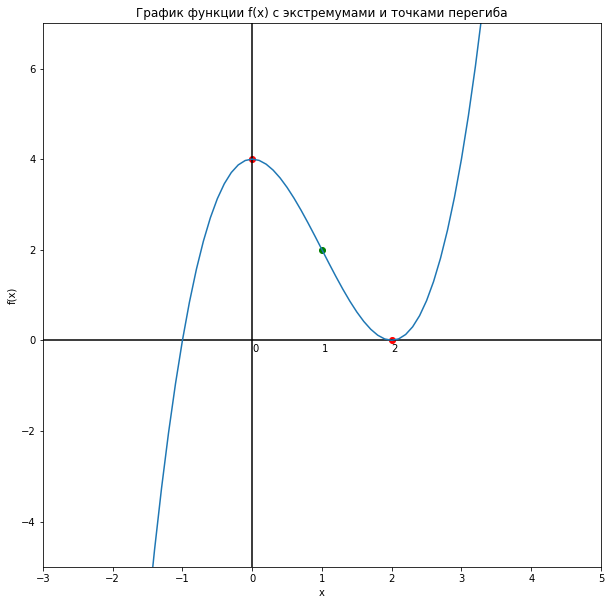

In [ ]:
# your code here

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [ ]:
# your code here

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

In [ ]:
# your code here

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

In [ ]:
# your code here

## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

In [ ]:
# your code here

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [ ]:
# your code here

## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [ ]:
# your code here

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

In [ ]:
# your code here

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)